<a href="https://colab.research.google.com/github/Sahilgupta100/datascience/blob/main/employeeburntoutanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [40]:
data =pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [41]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [42]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [43]:
data["Date of Joining"]=pd.to_datetime(data["Date of Joining"])

In [44]:
data.corr(numeric_only=True)['Burn Rate']

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546
Burn Rate,1.000000


In [45]:
data.duplicated().sum()

0

In [46]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [47]:
data.isnull().sum().values.sum()

4622

In [48]:
for i,col in enumerate(data.columns):
  print(f"\n{data[col].unique()}")
  print(f"\n{data[col].value_counts()}")


['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: count, Length: 22750, dtype: int64

<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-03 00:00:

In [49]:
data=data.drop(["Employee ID"],axis=1)

In [50]:
data.head(4)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20


In [51]:
data = data.dropna(axis=0)

In [52]:
data.isnull().sum()


,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [53]:
data_2008 = pd.to_datetime(["2008-01-11"]*len(data))
data["Days"]=data["Date of Joining"].astype("datetime64[ns]").sub(data_2008).dt.days



In [54]:
data.Days

,Days
0,263
1,324
3,297
4,195
5,320
...,...
22743,339
22744,137
22746,8
22748,-1


In [55]:
numerical_data = data.select_dtypes(include=["number"])

In [56]:
correlation = numerical_data.corr()["Burn Rate"]
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [57]:
data["Date of Joining"].corr(data["Burn Rate"])

0.0003090072660043124

In [58]:
data["Date of Joining"].info()

<class 'pandas.core.series.Series'>
Index: 18590 entries, 0 to 22749
Series name: Date of Joining
Non-Null Count  Dtype         
--------------  -----         
18590 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 290.5 KB


In [59]:
data=data.drop(["Date of Joining","Days"],axis=1)

In [60]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [61]:
cat_columns = data.select_dtypes(object).columns
print(cat_columns)


Index(['Gender', 'Company Type', 'WFH Setup Available'], dtype='object')


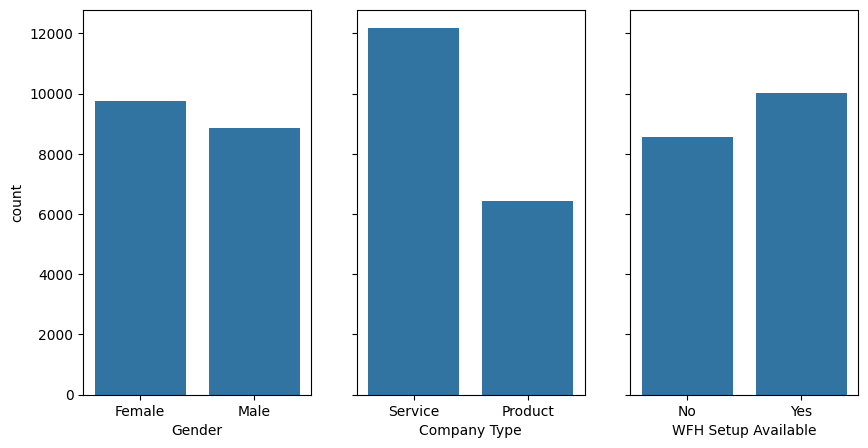

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=len(cat_columns),sharey = True,figsize=(10,5))
for i,c in enumerate(cat_columns):
  sns.countplot(x=c,data = data,ax=ax[i])
plt.show()

In [63]:
data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...
22743,Female,Product,Yes,1,3.0,6.0,0.48
22744,Male,Product,No,3,7.0,6.2,0.54
22746,Female,Product,Yes,3,6.0,6.7,0.59
22748,Female,Service,No,2,5.0,5.9,0.52


In [64]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)
data.head()


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True


In [65]:
y = data["Burn Rate"]
x = data.drop(['Burn Rate'],axis = 1)

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.7,shuffle= True,random_state=10)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

In [67]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_predict = lm.predict(X_test)


In [68]:
mse = mean_squared_error(Y_test,Y_predict)
print(f"Mean Squared Error : {mse}")
mae = mean_absolute_error(Y_test,Y_predict)
print(f"Mean Absolute Error : {mae}")
r_2 = r2_score(Y_test,Y_predict)
print(f"R-Squared : {r_2}")

Mean Squared Error : 0.0030030382328273503
Mean Absolute Error : 0.04481375458620436
R-Squared : 0.922324328791648
